In [63]:
import pandas as pd 

import matplotlib.pyplot as plt
import json

# EDA on Drug Recall data.
## List of Columns and descriptions
* status: The current status of the recall, indicating whether it is ongoing, completed, or terminated.
* city: The city where the recalling firm is located.
* state: The state where the recalling firm is located.
* country: The country where the recalling firm is located.
* classification: The classification of the recall, which typically indicates the level of health hazard posed by the product being recalled (e.g., Class I, II, or III).
    1. Class I - a situation in which there is a reasonable probability that the use of, or exposure to, a violative product will cause serious adverse health consequences or death.
    2. Class II - a situation in which use of, or exposure to, a violative product may cause temporary or medically reversible adverse health consequences or where the probability of serious adverse health consequences is remote.
    3. Class III - a situation in which use of, or exposure to, a violative product is not likely to cause adverse health consequences.
* product_type: The type of product being recalled, such as a drug, device, or food product.
* recalling_firm: The name of the firm that is recalling the product.
* initial_firm_notification: The method or date when the recalling firm was initially notified about the issue leading to the recall.
* distribution_pattern: The pattern or scope of distribution for the recalled product, indicating where the product was distributed.
* product_description: A description of the product being recalled, including details like brand name, dosage form, etc.
* product_quantity: The quantity of the product that is being recalled.
* reason_for_recall: The reason why the product is being recalled, such as contamination, mislabeling, or safety concerns.
* recall_initiation_date: The date when the recall was initiated.
* report_date: The date when the recall was reported to the relevant authorities.
* termination_date: The date when the recall was officially terminated.
* days_to_termination: The number of days between the recall initiation date and the termination date, indicating the duration of the recall process.


In [64]:
df = pd.read_csv("./../datafiles/drug-enforcement-data.csv")
df.describe()

,Unnamed: 0,recall_initiation_date,report_date,termination_date,days_to_termination
count,16567.00000,1.656700e+04,1.656700e+04,1.404300e+04,14043.000000
mean,8283.00000,2.017653e+07,2.017899e+07,2.018856e+07,661.732749
std,4782.62529,3.437801e+04,3.376778e+04,3.485123e+04,463.624723
min,0.00000,2.006022e+07,2.012062e+07,2.012070e+07,8.000000
25%,4141.50000,2.015031e+07,2.015060e+07,2.016021e+07,325.500000
50%,8283.00000,2.018033e+07,2.018050e+07,2.019012e+07,559.000000
75%,12424.50000,2.020122e+07,2.021030e+07,2.022081e+07,889.000000
max,16566.00000,2.024113e+07,2.024121e+07,2.024121e+07,4169.000000


In [65]:
# Identify categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Print the lists of categorical and numerical variables
print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['status', 'city', 'state', 'country', 'classification', 'product_type', 'recalling_firm', 'initial_firm_notification', 'distribution_pattern', 'product_description', 'product_quantity', 'reason_for_recall']
Numerical Variables: ['Unnamed: 0', 'recall_initiation_date', 'report_date', 'termination_date', 'days_to_termination']


In [66]:
# Extract year from recall_initiation_date, report_date, and termination_date
df['recall_initiation_year'] = df['recall_initiation_date'].astype(str).str[:4]
df['report_year'] = df['report_date'].astype(str).str[:4]
df['termination_year'] = df['termination_date'].astype(str).str[:4]

# Convert the extracted year columns to integers, handling NA values
df['recall_initiation_year'] = pd.to_numeric(df['recall_initiation_year'], errors='coerce')
df['report_year'] = pd.to_numeric(df['report_year'], errors='coerce')
df['termination_year'] = pd.to_numeric(df['termination_year'], errors='coerce')


In [67]:
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Print the lists of categorical and numerical variables
print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)

Categorical Variables: ['status', 'city', 'state', 'country', 'classification', 'product_type', 'recalling_firm', 'initial_firm_notification', 'distribution_pattern', 'product_description', 'product_quantity', 'reason_for_recall']
Numerical Variables: ['Unnamed: 0', 'recall_initiation_date', 'report_date', 'termination_date', 'days_to_termination', 'recall_initiation_year', 'report_year', 'termination_year']


In [68]:
df.describe()

,Unnamed: 0,recall_initiation_date,report_date,termination_date,days_to_termination,recall_initiation_year,report_year,termination_year
count,16567.00000,1.656700e+04,1.656700e+04,1.404300e+04,14043.000000,16567.000000,16567.000000,14043.000000
mean,8283.00000,2.017653e+07,2.017899e+07,2.018856e+07,661.732749,2017.585622,2017.833766,2018.792993
std,4782.62529,3.437801e+04,3.376778e+04,3.485123e+04,463.624723,3.440113,3.380782,3.483896
min,0.00000,2.006022e+07,2.012062e+07,2.012070e+07,8.000000,2006.000000,2012.000000,2012.000000
25%,4141.50000,2.015031e+07,2.015060e+07,2.016021e+07,325.500000,2015.000000,2015.000000,2016.000000
50%,8283.00000,2.018033e+07,2.018050e+07,2.019012e+07,559.000000,2018.000000,2018.000000,2019.000000
75%,12424.50000,2.020122e+07,2.021030e+07,2.022081e+07,889.000000,2020.000000,2021.000000,2022.000000
max,16566.00000,2.024113e+07,2.024121e+07,2.024121e+07,4169.000000,2024.000000,2024.000000,2024.000000


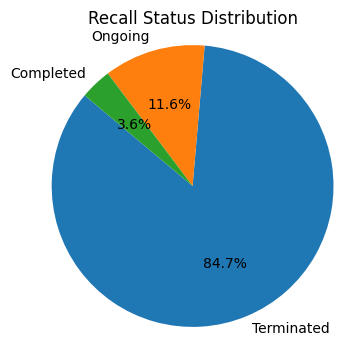

In [69]:
import matplotlib.pyplot as plt

# Count the occurrences of each recall status
status_count = df['status'].value_counts()

# Create a pie chart to visualize the recall status distribution using matplotlib
plt.figure(figsize=(4, 4))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Recall Status Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()



In [70]:
df.head()

,Unnamed: 0,status,city,state,country,classification,product_type,recalling_firm,initial_firm_notification,distribution_pattern,product_description,product_quantity,reason_for_recall,recall_initiation_date,report_date,termination_date,days_to_termination,recall_initiation_year,report_year,termination_year
0,0,Terminated,Whippany,NJ,United States,Class I,Drugs,Bayer Healthcare Pharmaceuticals Inc.,Press Release,"Distributed Nationwide in the US, Puerto Rico,...",Tinactin (Tolnaftate 1%) POWDER SPRAY NET WT 1...,"2,841,012 cans",Chemical Contamination: presence of benzene,20211001,20211124,20230626.0,633.0,2021,2021,2023.0
1,1,Ongoing,Athens,TN,United States,Class II,Drugs,Midlab Incorporated,Letter,Nationwide in the USA,"ROYALAB Germ Away Antibacterial Hand Soap, Chl...",NaN,cGMP Deviations: Out of specification results ...,20241106,20241211,NaN,NaN,2024,2024,NaN
2,2,Ongoing,East Windsor,NJ,United States,Class II,Drugs,Aurobindo Pharma USA Inc,Letter,USA Nationwide,"Cinacalcet Tablets, 60mg, packaged in: a) 30-c...",3336 bottles,cGMP Deviations: Presence of N-nitroso Cinacal...,20241107,20241211,NaN,NaN,2024,2024,NaN
3,3,Terminated,Lake Forest,IL,United States,Class II,Drugs,"Hospira, Inc.",Letter,Nationwide,"Ondansetron Injection, USP, 4mg/2mL, (2mg/ml),...","340,600 vials",Presence of Particulate; lot being recalled as...,20130520,20130814,20141028.0,526.0,2013,2013,2014.0
4,4,Terminated,Whippany,NJ,United States,Class II,Drugs,Bayer Healthcare Pharmaceuticals Inc.,Press Release,"Distributed Nationwide in the US, Puerto Rico,...",Tinactin (Tolnaftate 1%) DEODORANT POWDER SPRA...,"738,432 cans",cGMP Deviations: manufactured at the same faci...,20211001,20211124,20230626.0,633.0,2021,2021,2023.0


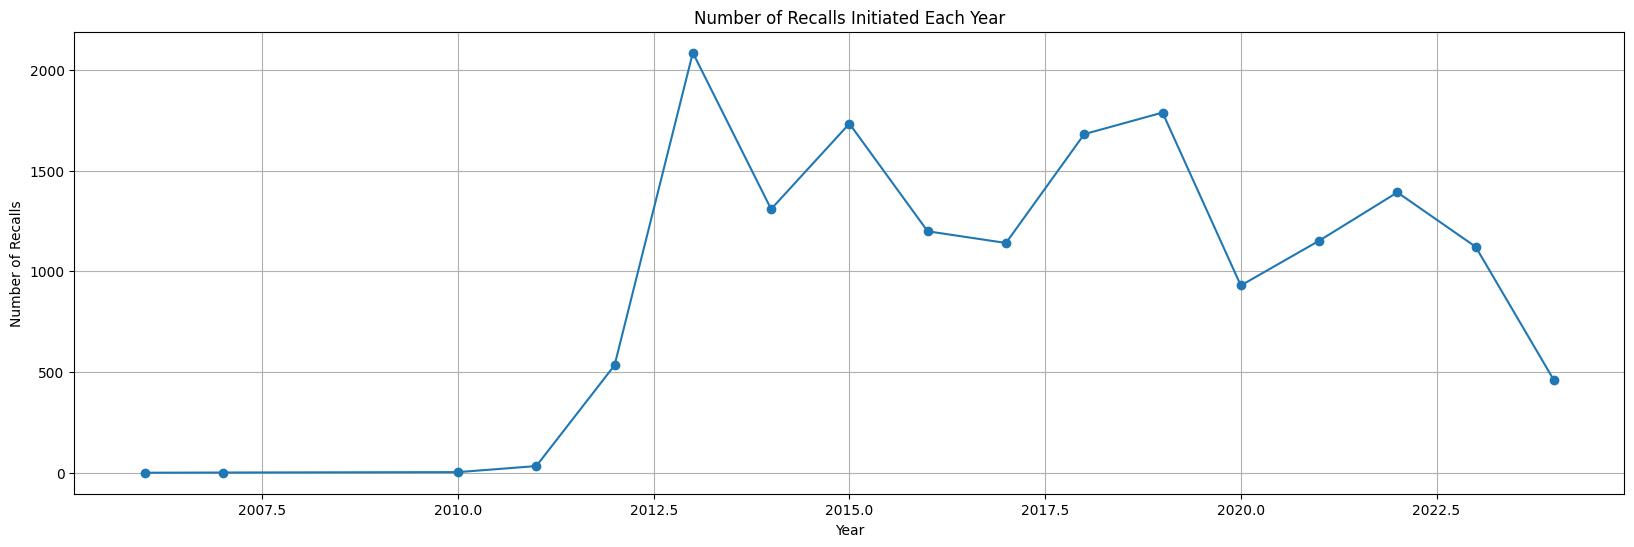

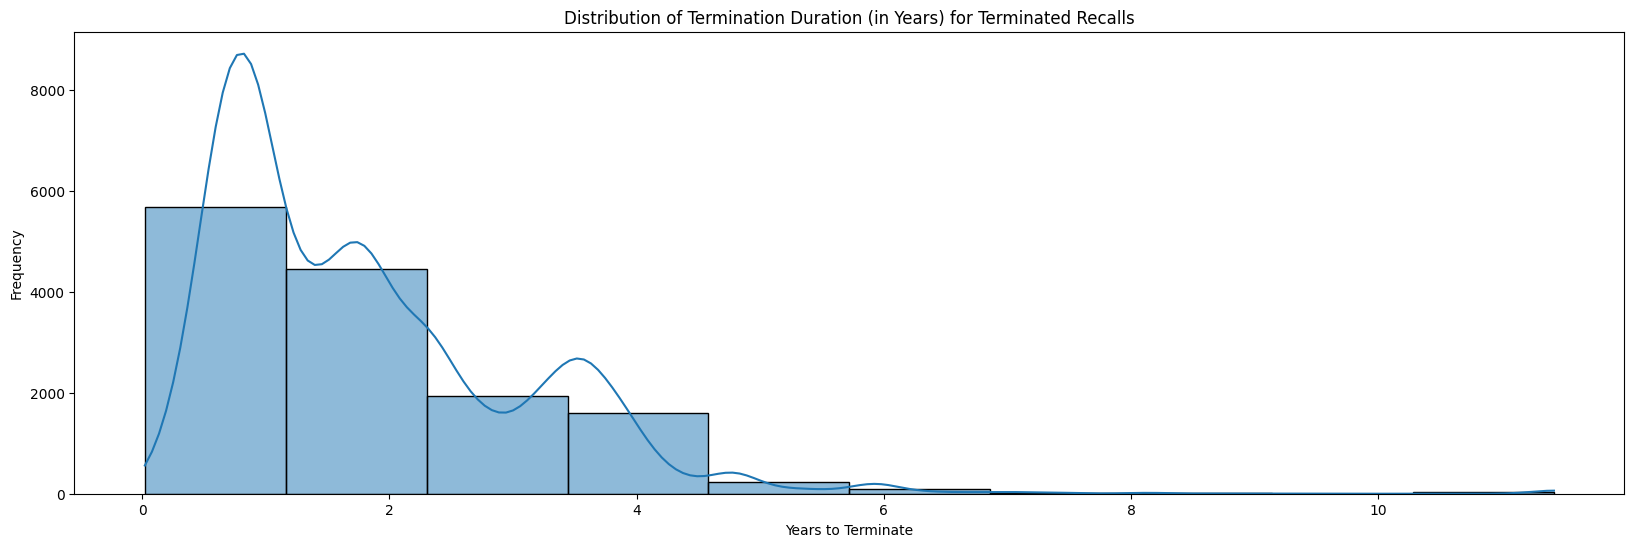

In [71]:
import seaborn as sns

df['termination_duration_years'] = pd.to_numeric(df['days_to_termination'], errors='coerce') / 365

# Step 3: Filter out the terminated recalls for analysis
terminated_recalls = df[df['status'] == 'Terminated']

# Step 4: Plot the number of recalls initiated per year
plt.figure(figsize=(20,6))
df.groupby('recall_initiation_year').size().plot(kind='line', marker='o')
plt.title('Number of Recalls Initiated Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(True)
plt.show()

# Step 5: Plot the termination duration (in years) for terminated recalls
plt.figure(figsize=(20,6))
sns.histplot(terminated_recalls['termination_duration_years'], bins=10, kde=True)
plt.title('Distribution of Termination Duration (in Years) for Terminated Recalls')
plt.xlabel('Years to Terminate')
plt.ylabel('Frequency')
plt.show()

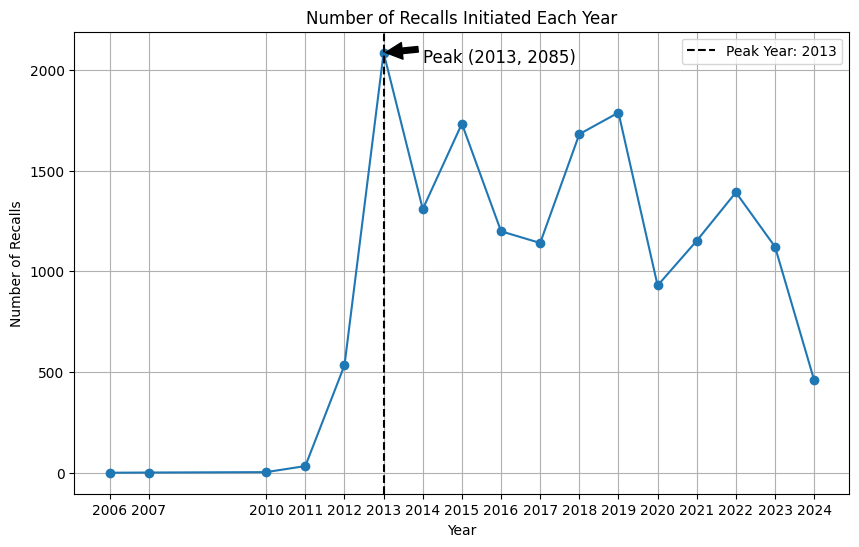

In [72]:
# Step 4: Plot the number of recalls initiated per year
plt.figure(figsize=(10,6))
recalls_per_year = df.groupby('recall_initiation_year').size()
recalls_per_year.plot(kind='line', marker='o')

# Find the year with the maximum number of recalls
peak_year = recalls_per_year.idxmax()
peak_value = recalls_per_year.max()

# Add a vertical line at the peak year
plt.axvline(peak_year, color='black', linestyle='--', label=f'Peak Year: {peak_year}')

# Annotate the peak
plt.annotate(f'Peak ({peak_year}, {peak_value})', 
             xy=(peak_year, peak_value), 
             xytext=(peak_year + 1, peak_value - 50),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Set the x-axis ticks to be integers (years only)
plt.xticks(ticks=recalls_per_year.index, labels=recalls_per_year.index)

plt.title('Number of Recalls Initiated Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(True)
plt.legend()  # Add legend to show the peak year
plt.show()


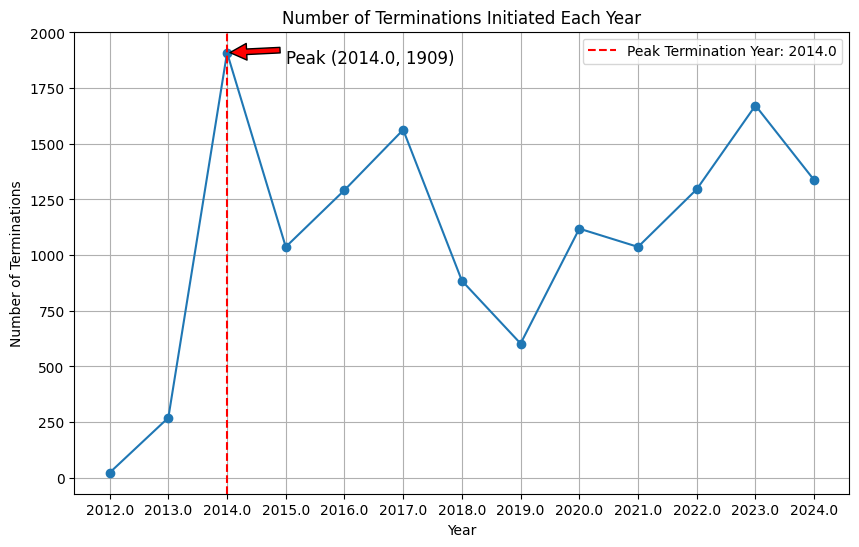

In [73]:
# Filter out rows where termination_year is NaN
terminated_recalls_per_year = df.dropna(subset=['termination_year']).groupby('termination_year').size()

# Plotting the trend for terminations
plt.figure(figsize=(10,6))
terminated_recalls_per_year.plot(kind='line', marker='o')

# Find the year with the maximum number of terminations
peak_termination_year = terminated_recalls_per_year.idxmax()
peak_termination_value = terminated_recalls_per_year.max()

# Add a vertical line at the peak termination year
plt.axvline(peak_termination_year, color='red', linestyle='--', label=f'Peak Termination Year: {peak_termination_year}')

# Annotate the peak
plt.annotate(f'Peak ({peak_termination_year}, {peak_termination_value})', 
             xy=(peak_termination_year, peak_termination_value), 
             xytext=(peak_termination_year + 1, peak_termination_value - 50),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12)

# Set the x-axis ticks to be integers (years only)
plt.xticks(ticks=terminated_recalls_per_year.index, labels=terminated_recalls_per_year.index)

# Set the title and labels
plt.title('Number of Terminations Initiated Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Terminations')
plt.grid(True)

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()


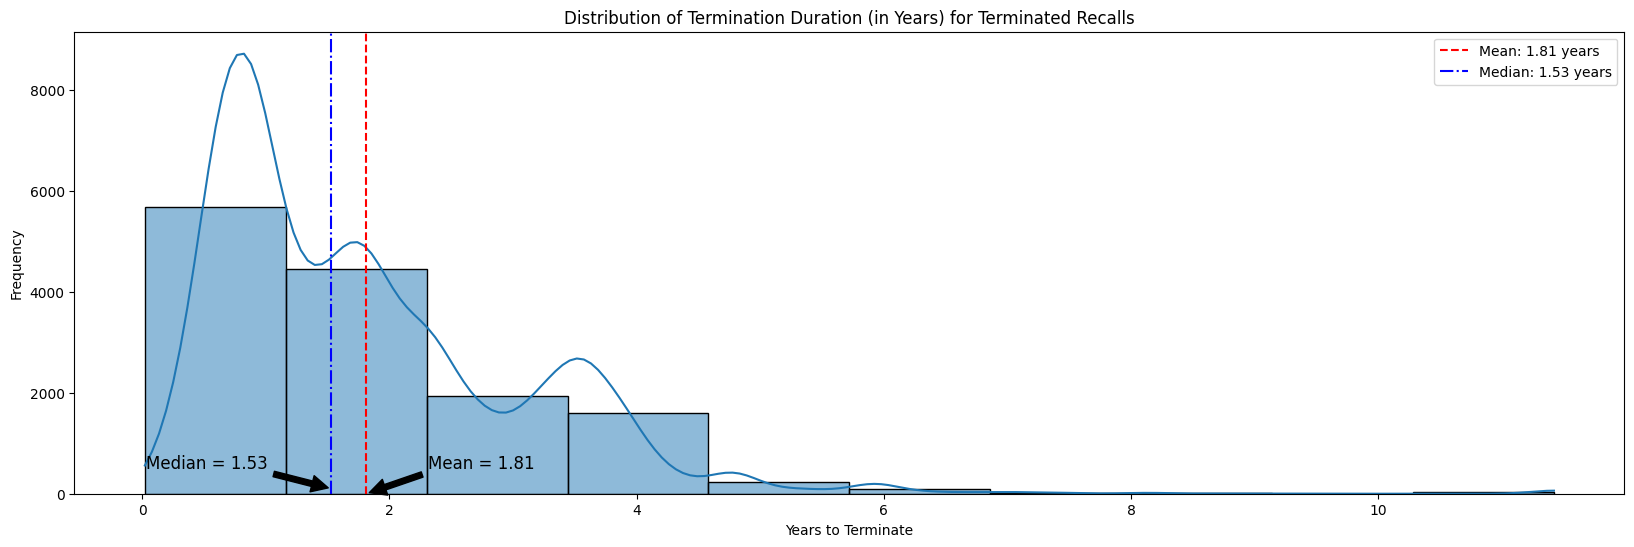

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `terminated_recalls` DataFrame is already available with 'termination_duration_years'

# Calculate the mean and median of termination duration
mean_duration = terminated_recalls['termination_duration_years'].mean()
median_duration = terminated_recalls['termination_duration_years'].median()

# Plot the distribution of termination duration
plt.figure(figsize=(20, 6))
sns.histplot(terminated_recalls['termination_duration_years'], bins=10, kde=True)

# Add a vertical line at the mean
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.2f} years')

# Add a vertical line at the median
plt.axvline(median_duration, color='blue', linestyle='-.', label=f'Median: {median_duration:.2f} years')

# Annotate the mean
plt.annotate(f'Mean = {mean_duration:.2f}', 
             xy=(mean_duration, 0), 
             xytext=(mean_duration + 0.5, 500),  # Adjust text position
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Annotate the median
plt.annotate(f'Median = {median_duration:.2f}', 
             xy=(median_duration, 100), 
             xytext=(median_duration - 1.5, 500),  # Adjust text position
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Add labels and title
plt.title('Distribution of Termination Duration (in Years) for Terminated Recalls')
plt.xlabel('Years to Terminate')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()


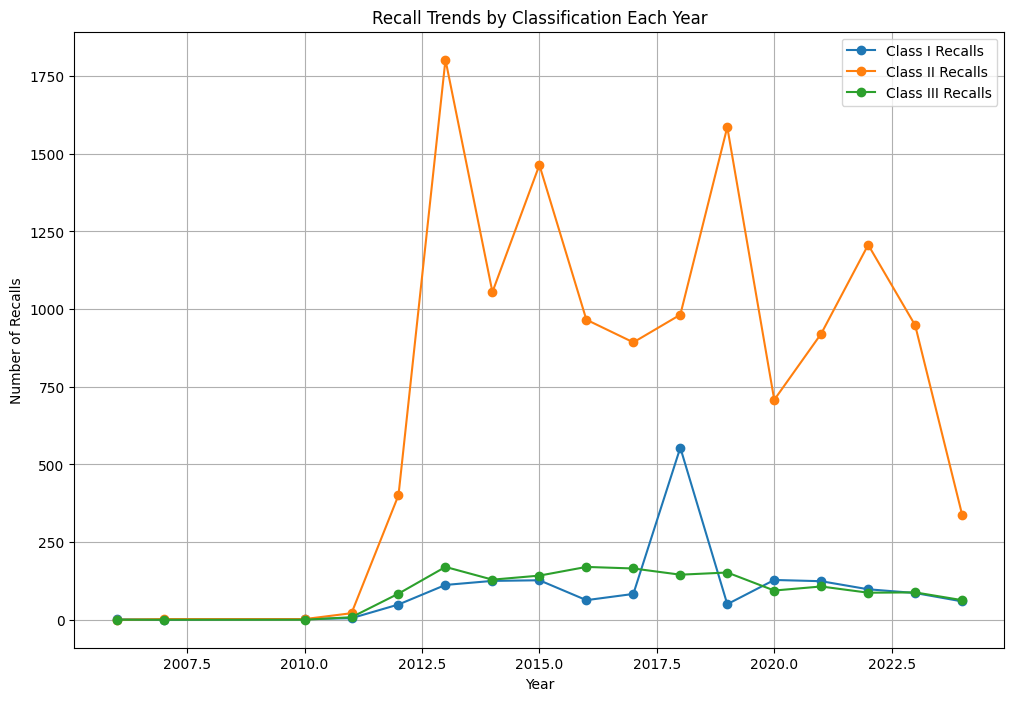

In [75]:
# Group by 'recall_initiation_year' and 'classification' to count the recalls per classification per year
recalls_by_classification_per_year = df.groupby(['recall_initiation_year', 'classification']).size().unstack(fill_value=0)

# Plotting the trend of recalls for each classification
plt.figure(figsize=(12,8))

# Plot each classification type
for classification in recalls_by_classification_per_year.columns:
    plt.plot(recalls_by_classification_per_year.index, recalls_by_classification_per_year[classification], label=f'{classification} Recalls', marker='o')

# Add title and labels
plt.title('Recall Trends by Classification Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(True)

# Add a legend to show the classification types
plt.legend()

# Show the plot
plt.show()


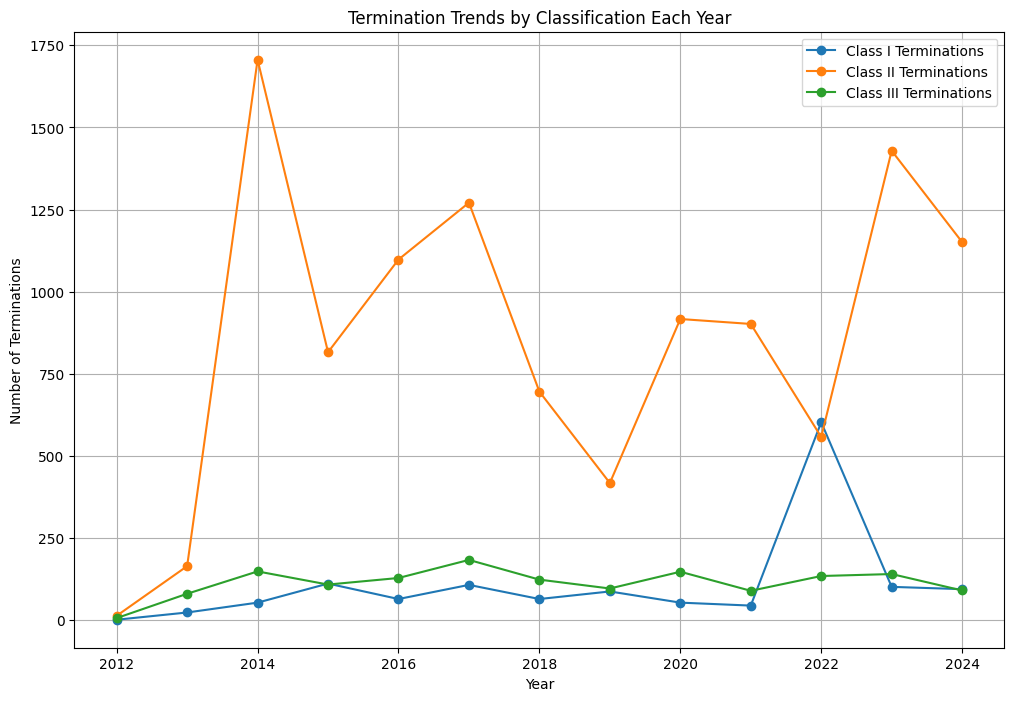

In [76]:
# Step 2: Group by 'termination_year' and 'classification' to count the terminations per classification per year
terminations_by_classification_per_year = df.groupby(['termination_year', 'classification']).size().unstack(fill_value=0)

# Step 3: Plotting the trend of terminations for each classification
plt.figure(figsize=(12,8))

# Plot each classification type
for classification in terminations_by_classification_per_year.columns:
    plt.plot(terminations_by_classification_per_year.index, terminations_by_classification_per_year[classification], label=f'{classification} Terminations', marker='o')

# Add title and labels
plt.title('Termination Trends by Classification Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Terminations')
plt.grid(True)

# Add a legend to show the classification types
plt.legend()

# Show the plot
plt.show()


In [85]:
df['reason_for_recall'] = df['reason_for_recall'].replace({
    "Penicillin Cross Contamination: All lots of all products repackaged and distributed between 01/05/12 and 02/12/15 are being recalled because they were repackaged in a facility with penicillin products without adequate separation which could introduce the potential for cross contamination with penicillin.": "Penicillin Cross Contamination",
    "Lack of Assurance of Sterility; FDA inspection identified GMP violations potentially impacting product quality and sterility": "Lack of Assurance of Sterility",
    "Lack of sterility assurance.": "Lack of Assurance of Sterility",
    "The firm received seven reports of adverse reactions in the form of skin abscesses potentially linked to compounded preservative-free methylprednisolone 80mg/ml 10 ml vials.": "Adverse Reactions",
    "CGMP Deviations: Intermittent exposure to temperature excursion during storage.": "CGMP Deviations (Deviated from regulations)"
})

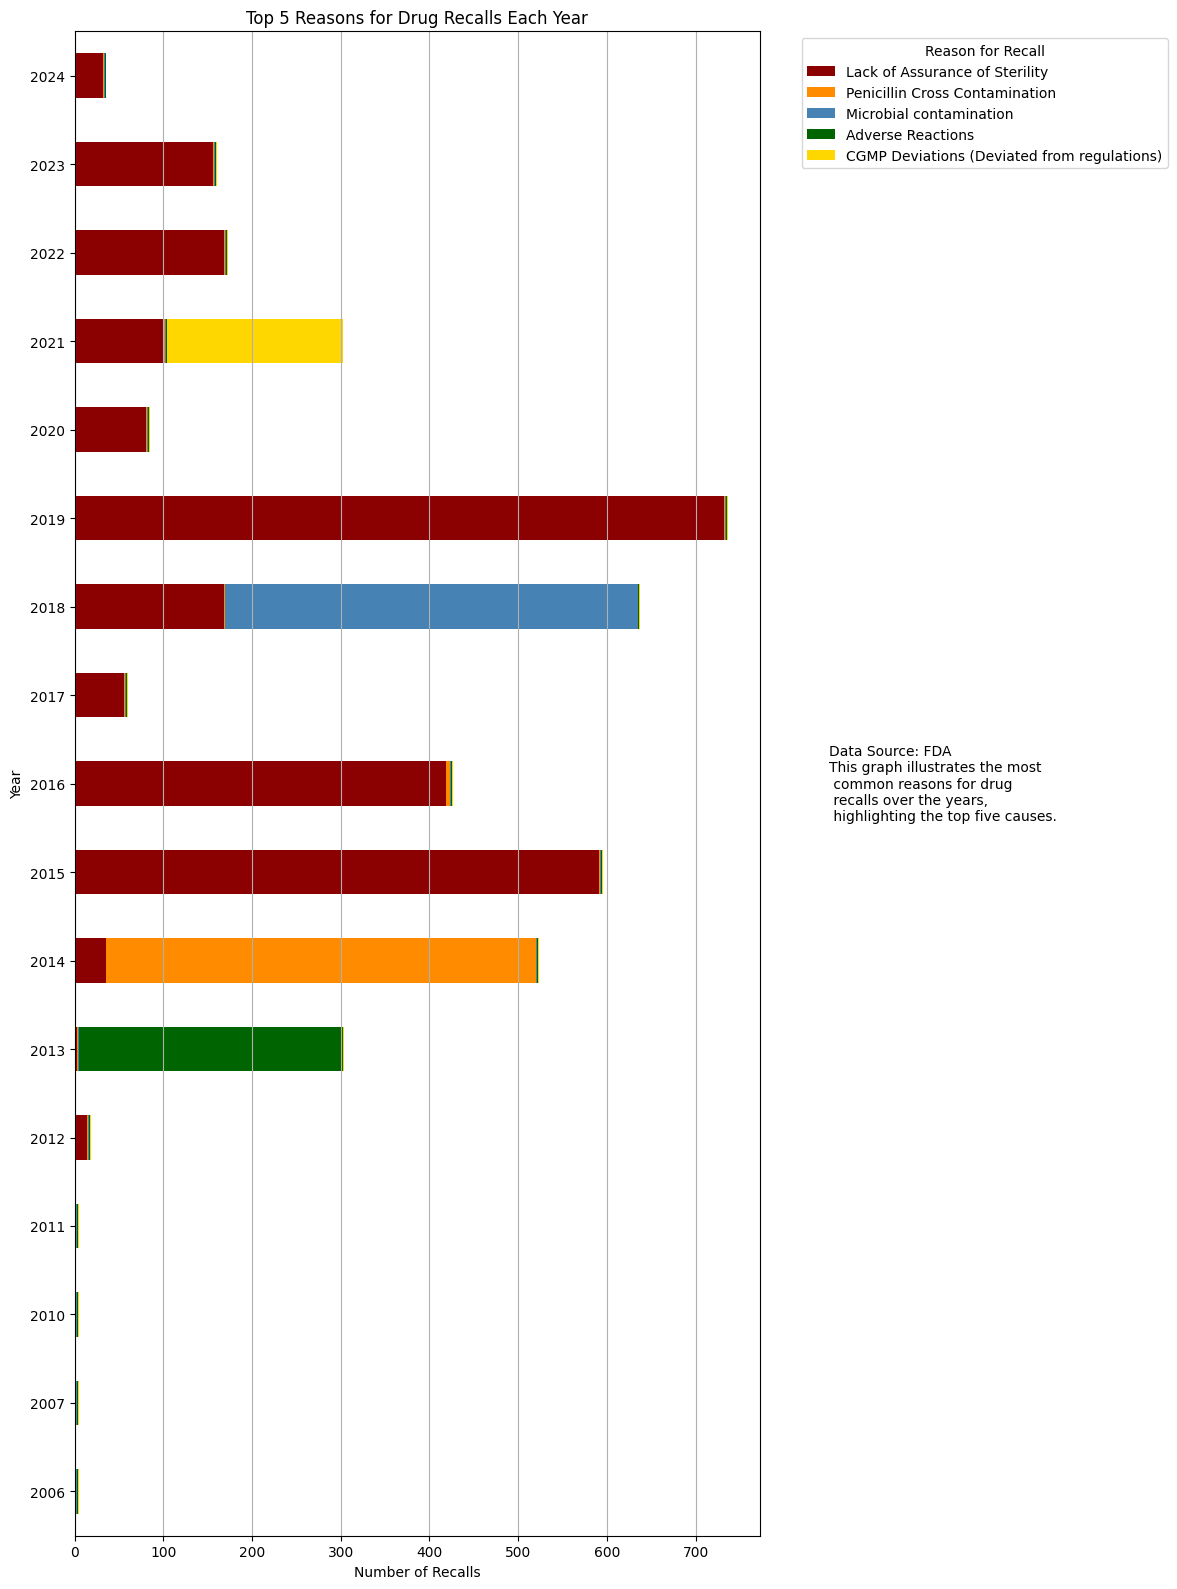

In [101]:
# Step 1: Group by 'recall_initiation_year' and 'reason_for_recall' to count the recalls per reason per year
recalls_by_reason_per_year = df.groupby(['recall_initiation_year', 'reason_for_recall']).size().unstack(fill_value=1)

# Step 2: Identify the top 5 reasons for recall
top_5_reasons = recalls_by_reason_per_year.sum().nlargest(5).index

# Step 3: Filter the data to include only the top 5 reasons
top_5_recalls_by_reason_per_year = recalls_by_reason_per_year[top_5_reasons]

# Step 4: Plotting the horizontal bar graph for the top 5 reasons each year
plt.figure(figsize=(12, 16))
top_5_recalls_by_reason_per_year.plot(kind='barh', stacked=True, color=['#8B0000', '#FF8C00', '#4682B4', '#006400', '#FFD700'], ax=plt.gca())

# Add title and labels
plt.title('Top 5 Reasons for Drug Recalls Each Year')
plt.xlabel('Number of Recalls')
plt.ylabel('Year')
plt.grid(axis='x')

# Add a legend to show the reasons for recall
plt.legend(title='Reason for Recall', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a paragraph below the legend, on the side of the plot
plt.text(1.1, 0.5, 'Data Source: FDA \nThis graph illustrates the most \n common reasons for drug \n recalls over the years, \n highlighting the top five causes.', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', horizontalalignment='left')

# Show the plot
plt.tight_layout()
plt.show()


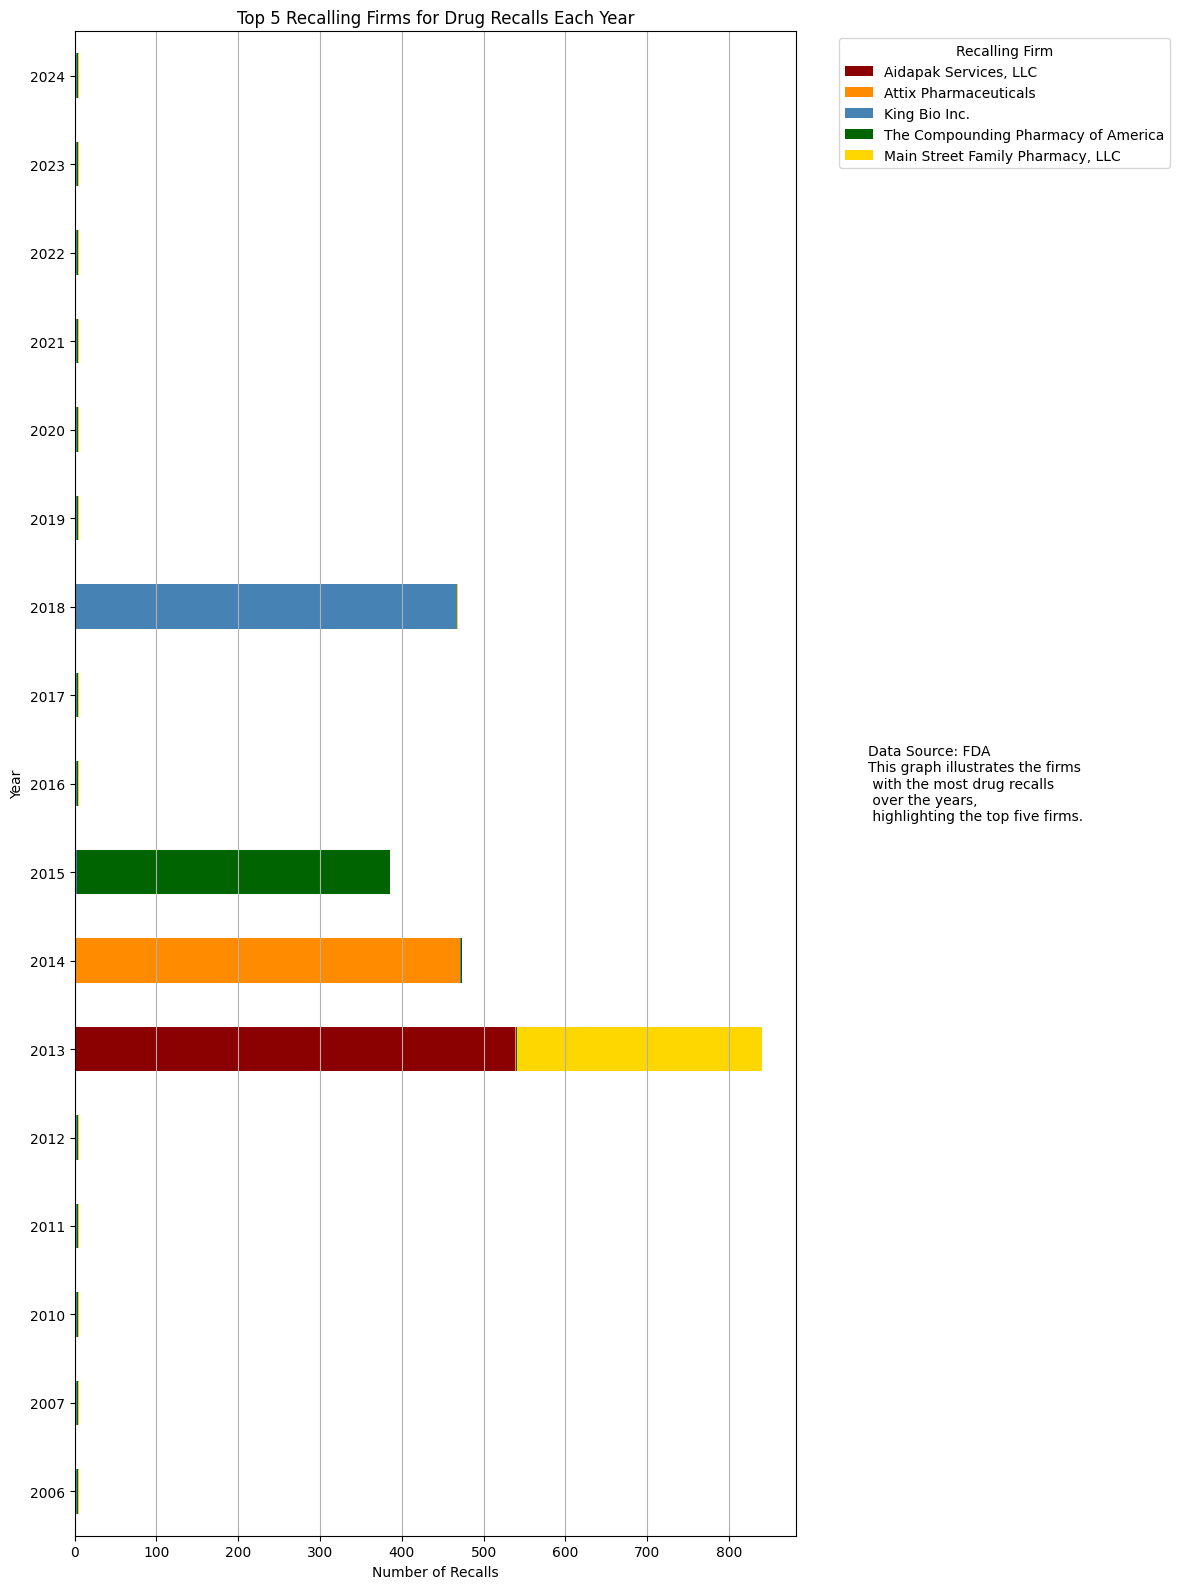

In [107]:
# Step 1: Group by 'recall_initiation_year' and 'recalling_firm' to count the recalls per firm per year
recalls_by_firm_per_year = df.groupby(['recall_initiation_year', 'recalling_firm']).size().unstack(fill_value=1)

# Step 2: Identify the top 5 firms with the most recalls
top_5_firms = recalls_by_firm_per_year.sum().nlargest(5).index

# Step 3: Filter the data to include only the top 5 firms
top_5_recalls_by_firm_per_year = recalls_by_firm_per_year[top_5_firms]

# Step 4: Plotting the horizontal bar graph for the top 5 firms each year
plt.figure(figsize=(12, 16))
top_5_recalls_by_firm_per_year.plot(kind='barh', stacked=True, color=['#8B0000', '#FF8C00', '#4682B4', '#006400', '#FFD700'], ax=plt.gca())

# Add title and labels
plt.title('Top 5 Recalling Firms for Drug Recalls Each Year')
plt.xlabel('Number of Recalls')
plt.ylabel('Year')
plt.grid(axis='x')

# Add a legend to show the recalling firms
plt.legend(title='Recalling Firm', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


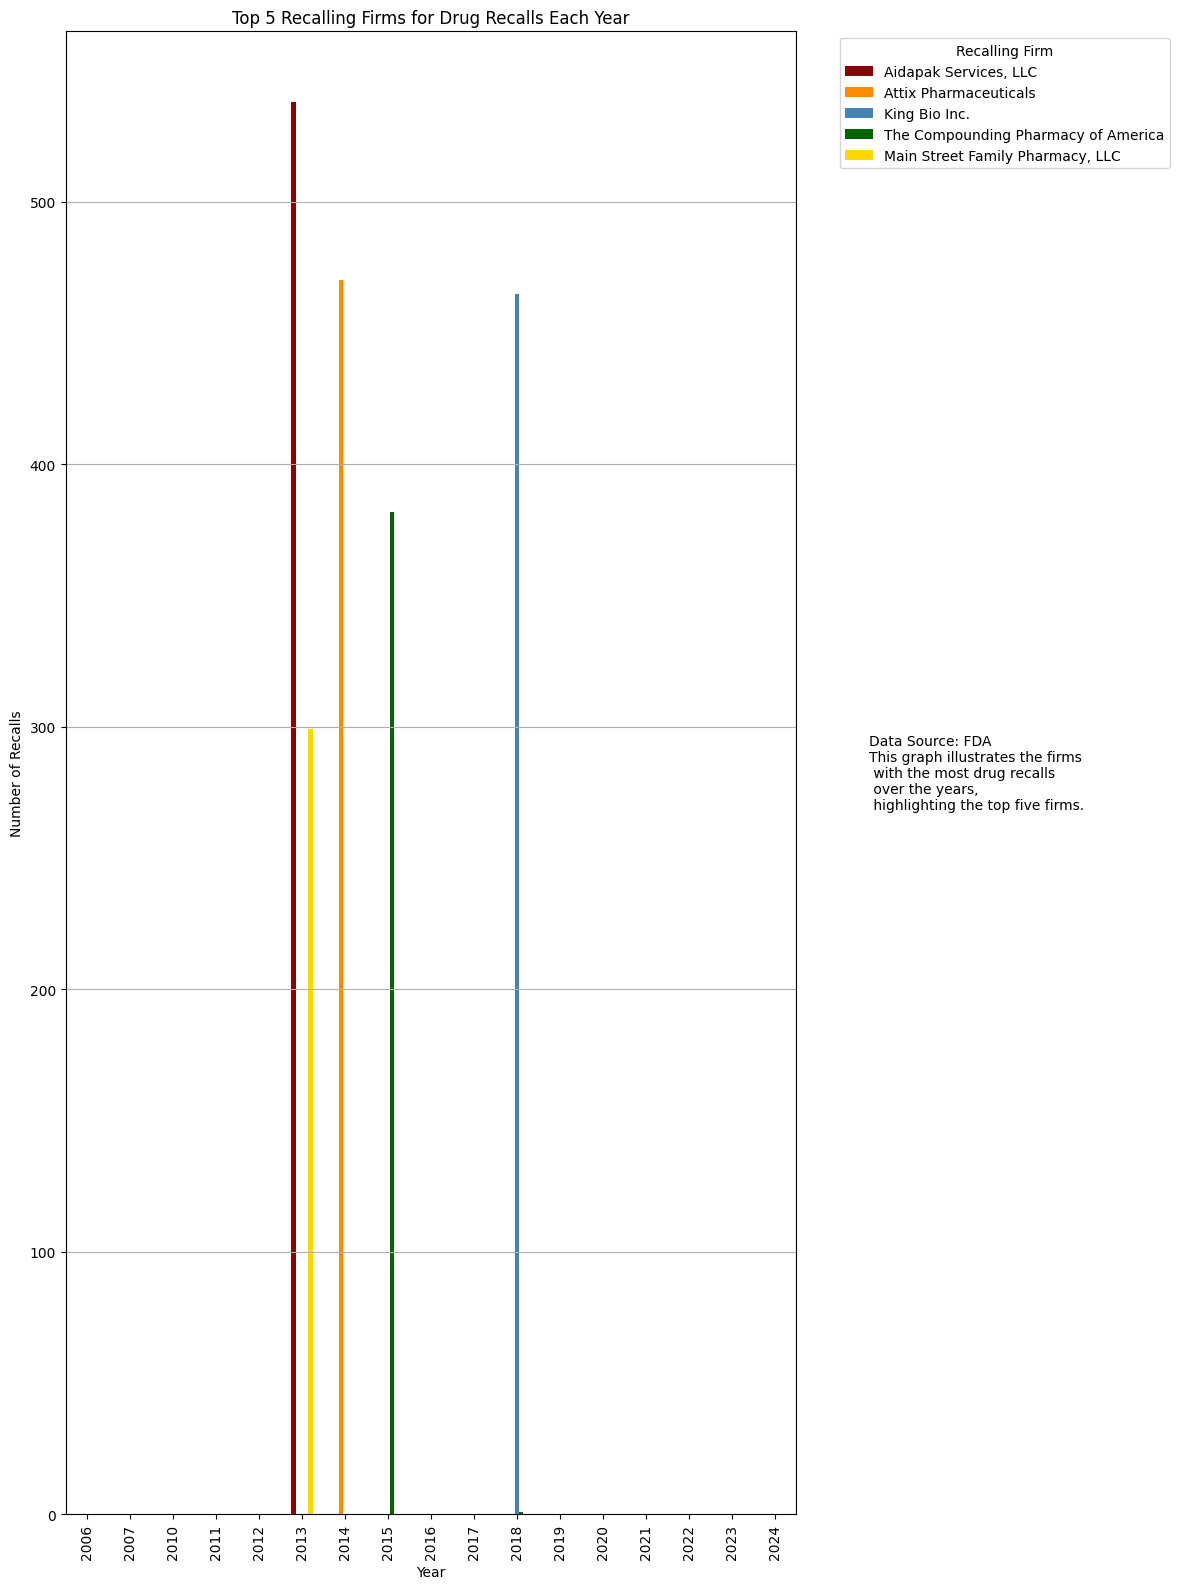

In [106]:
# INSERT_YOUR_REWRITE_HERE

# Step 1: Group by 'recall_initiation_year' and 'recalling_firm' to count the recalls per firm per year
recalls_by_firm_per_year = df.groupby(['recall_initiation_year', 'recalling_firm']).size().unstack(fill_value=0)

# Step 2: Identify the top 5 firms with the most recalls
top_5_firms = recalls_by_firm_per_year.sum().nlargest(5).index

# Step 3: Filter the data to include only the top 5 firms for recalls
top_5_recalls_by_firm_per_year = recalls_by_firm_per_year[top_5_firms]

# Step 4: Plotting the stacked bar graph for the top 5 firms each year for recalls
fig, ax = plt.subplots(figsize=(12, 16))

# Plot recalls
top_5_recalls_by_firm_per_year.plot(kind='bar', stacked=False, ax=ax, color=['#8B0000', '#FF8C00', '#4682B4', '#006400', '#FFD700'])

# Add title and labels
ax.set_title('Top 5 Recalling Firms for Drug Recalls Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Recalls')
ax.grid(axis='y')

# Add a legend to show the recalling firms
ax.legend(title='Recalling Firm', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a paragraph below the legend, on the side of the plot
plt.text(1.1, 0.5, 'Data Source: FDA \nThis graph illustrates the firms \n with the most drug recalls \n over the years, \n highlighting the top five firms.', 
         transform=ax.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='left')

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'BytesIO' is not defined

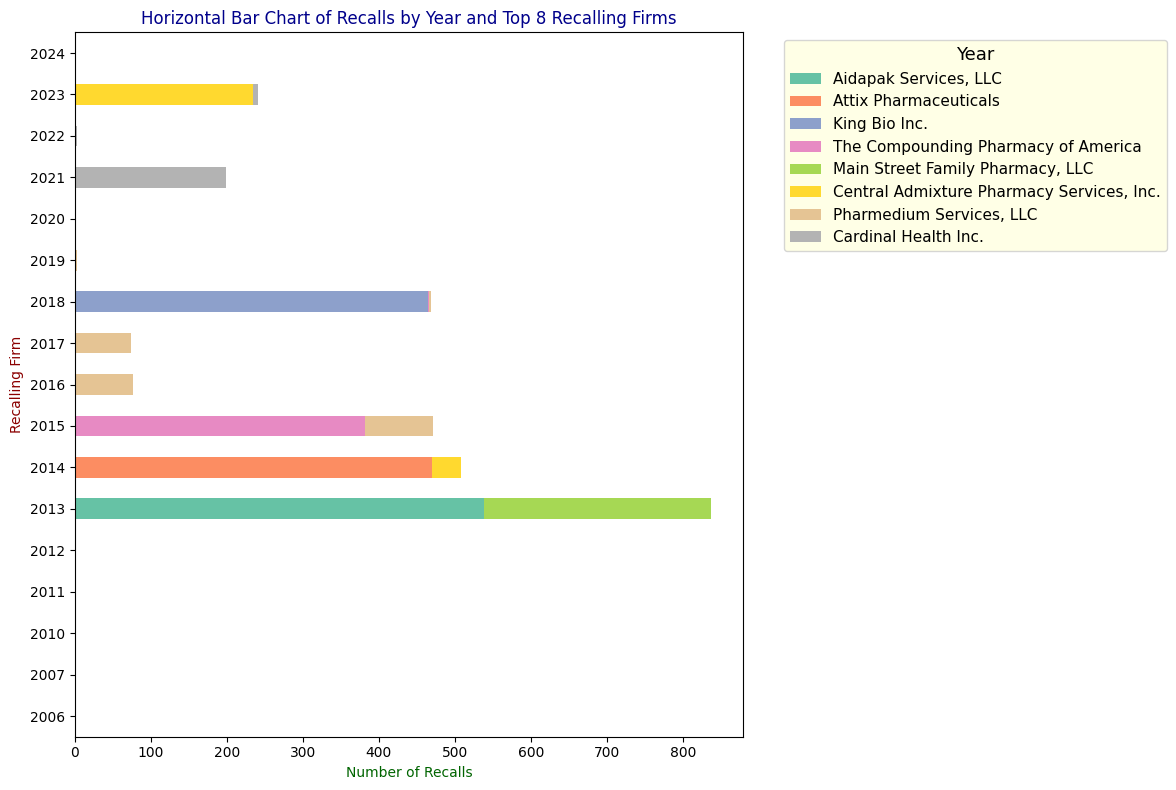

In [108]:
# INSERT_YOUR_REWRITE_HERE

# Group by 'recall_initiation_year' and 'recalling_firm' to count the recalls per firm per year
recalls_by_firm_per_year = df.groupby(['recall_initiation_year', 'recalling_firm']).size().unstack(fill_value=0)

# Identify the top 8 firms with the most recalls
top_firms = recalls_by_firm_per_year.sum().nlargest(8).index

# Filter the data to include only the top 8 firms
df_top_firms = recalls_by_firm_per_year[top_firms]

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))
df_top_firms.plot(kind='barh', stacked=True, ax=ax, colormap='Set2')
ax.set_title('Horizontal Bar Chart of Recalls by Year and Top 8 Recalling Firms', color='darkblue')
ax.set_xlabel('Number of Recalls', color='darkgreen')
ax.set_ylabel('Recalling Firm', color='darkred')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='13', fontsize='11', facecolor='lightyellow')
plt.tight_layout()

# Save the figure to a BytesIO object
buf = BytesIO()
plt.savefig(buf, format="png")
plt.close(fig)
buf.seek(0)
image_base64 = base64.b64encode(buf.read()).decode('utf-8')
return image_base64

In [109]:
df.head()

,Unnamed: 0,status,city,state,country,classification,product_type,recalling_firm,initial_firm_notification,distribution_pattern,...,product_quantity,reason_for_recall,recall_initiation_date,report_date,termination_date,days_to_termination,recall_initiation_year,report_year,termination_year,termination_duration_years
0,0,Terminated,Whippany,NJ,United States,Class I,Drugs,Bayer Healthcare Pharmaceuticals Inc.,Press Release,"Distributed Nationwide in the US, Puerto Rico,...",...,"2,841,012 cans",Chemical Contamination: presence of benzene,20211001,20211124,20230626.0,633.0,2021,2021,2023.0,1.734247
1,1,Ongoing,Athens,TN,United States,Class II,Drugs,Midlab Incorporated,Letter,Nationwide in the USA,...,NaN,cGMP Deviations: Out of specification results ...,20241106,20241211,NaN,NaN,2024,2024,NaN,NaN
2,2,Ongoing,East Windsor,NJ,United States,Class II,Drugs,Aurobindo Pharma USA Inc,Letter,USA Nationwide,...,3336 bottles,cGMP Deviations: Presence of N-nitroso Cinacal...,20241107,20241211,NaN,NaN,2024,2024,NaN,NaN
3,3,Terminated,Lake Forest,IL,United States,Class II,Drugs,"Hospira, Inc.",Letter,Nationwide,...,"340,600 vials",Presence of Particulate; lot being recalled as...,20130520,20130814,20141028.0,526.0,2013,2013,2014.0,1.441096
4,4,Terminated,Whippany,NJ,United States,Class II,Drugs,Bayer Healthcare Pharmaceuticals Inc.,Press Release,"Distributed Nationwide in the US, Puerto Rico,...",...,"738,432 cans",cGMP Deviations: manufactured at the same faci...,20211001,20211124,20230626.0,633.0,2021,2021,2023.0,1.734247


In [110]:
# INSERT_YOUR_CODE

# Count the unique ways of 'initial_firm_notification' and their occurrences
unique_notifications_count = df['initial_firm_notification'].value_counts()

# Display the unique ways and their counts
print("Unique ways of initial_firm_notifications and their counts:")
print(unique_notifications_count)


Unique ways of initial_firm_notifications and their counts:
initial_firm_notification
Letter                                                                               8180
Telephone                                                                            2703
Press Release                                                                        2546
Two or more of the following: Email, Fax, Letter, Press Release, Telephone, Visit    1640
E-Mail                                                                               1065
Other                                                                                 182
FAX                                                                                    25
Visit                                                                                   7
Name: count, dtype: int64


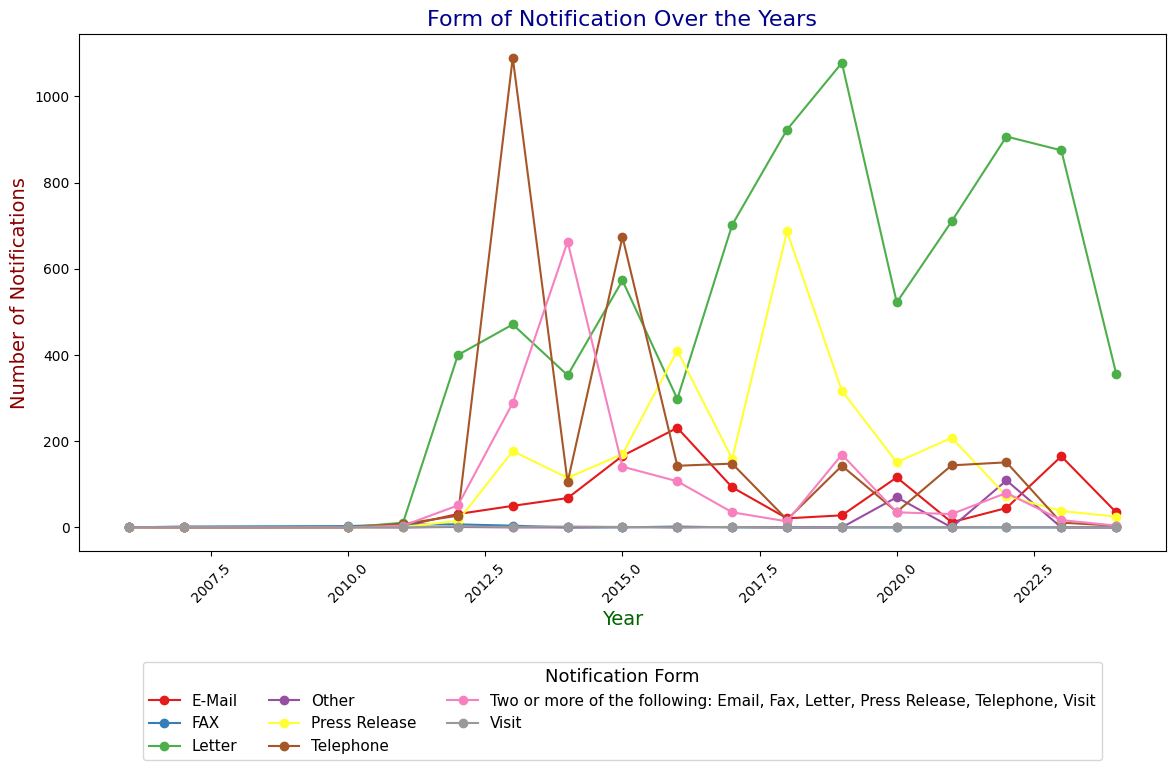

In [116]:
# INSERT_YOUR_REWRITE_HERE

# Group by 'recall_initiation_year' and 'initial_firm_notification' to count the notifications per year
notifications_by_year = df.groupby(['recall_initiation_year', 'initial_firm_notification']).size().unstack(fill_value=0)

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))
notifications_by_year.plot(kind='line', ax=ax, colormap='Set1', marker='o')
ax.set_title('Form of Notification Over the Years', fontsize=16, color='darkblue')
ax.set_xlabel('Year', fontsize=14, color='darkgreen')
ax.set_ylabel('Number of Notifications', fontsize=14, color='darkred')
ax.legend(title='Notification Form', bbox_to_anchor=(0.5, -0.2), loc='upper center', title_fontsize='13', fontsize='11', ncol=3)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
